# 8.5 2D Homographies - Applications

Now you are familiar with homographies, this notebook proposes two more applications in sports where using this technique enhances the experience of viewer. You are asked to implement a solution for each one. As you already know the fundamentals of the homography computation, this notebook will not address any theoretical aspect, but only presents the applications and asks for your solutions!

### Some notes on the implementation
- If you use the command `%matplotlib notebook`, you'll be able to get the coordinates on the image at the mouse position. Use this **in each cell** when you need to select points on the images. Unfortunately this doesn't work in all jupyter frameworks (not in Google Colab, for instance). If it does not work, you'll have to get the point coordinates by opening the image with a typical image processing application (such as Irfanview, GIMP, etc.).
- Take into account that when you are computing a homography you are mapping image coordinates to *real world* coordinates (those in the real, unwarped plane), so if the latter **are too small** you will end up with a very small unwarped image. This will make more difficult to get references in such a small image. In some way, you are *losing resolution*. So, when creating the coordinates of the unwarped planes, use a value (factor) to multiply the real coordinates so that you get an image large enough to pick up points properly.

In [11]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# set image path
images_path = './images/'

# This will allow you to see the pixel position where the mouse is pointing
# %matplotlib notebook
%matplotlib inline

## 8.5.1 Application 1: Long jump competiton

The *Olympics committee* has a special work for you: to develop a computer vision program able to decide if a jump is valid (the jumper has not overstepped the plasticine board) and the distance from the step to this plasticine board.

The following image shows the parts of the zone where the jumper has to take-off: the **take-off board** (with a width of 20cm), the **take-off line** (included in the take-off board) and the **plasticine indicator** (10cm width). In total, the area of this zone is **30$\times$122cm**.

<img src="./images/take_off_zone.png" width="300">$\\[5pt]$

The *Olympics committee* wants you to evaluate your software using a number of provided images, named `long_jump_0.png` to `lon_jump_4.png`, which are annotated with the distance from the jumper sneaker tip to the beginning of the plasticine indicator. With this goal, implement a code that:
- Computes the homography between the take-off zone in the images and a rectangle with the real size (30x122cm).
- Select manually the point at the jumper sneaker tip in the zone without perspective.
- Having that coordinate, computes and reports the distance from it to the plasticine indicator. 

Is this distance the same as the provided one in the images?

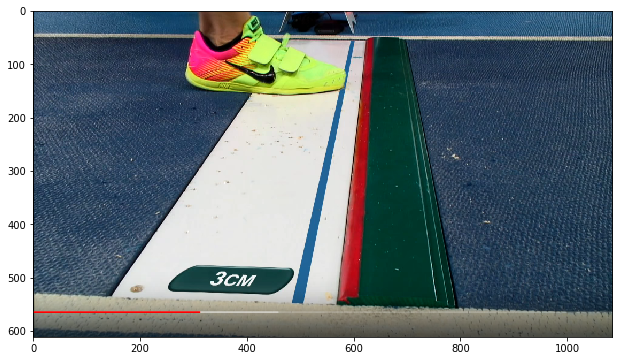

In [12]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# APPLICATION 1: Long jump competition
# Write your code here

# load image
image = cv2.imread(images_path + 'long_jump_0.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# show it
plt.imshow(image)

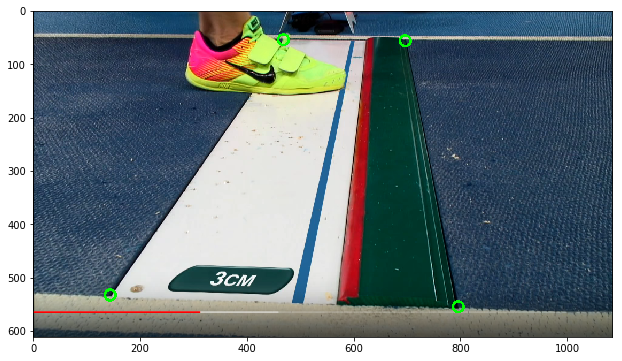

In [13]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# point coordinates in the image
pts_src = np.array([[468,  55],
                    [696,  57],
                    [144, 532],
                    [795, 554]])

image_draw = np.copy(image)
for i in range(4):
    cv2.circle(image_draw,(pts_src[i][0],pts_src[i][1]),10,(0,255,0),3)
plt.imshow(image_draw)

Distance: 3.0 cm


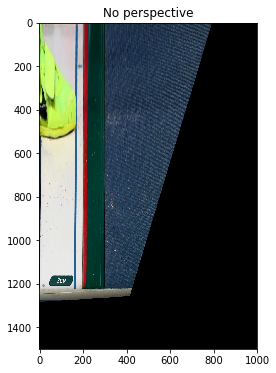

In [14]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# %matplotlib notebook

# Points of a rectangle without perspective
factor = 10 # for better resolution
w = 30*factor
h = 122*factor
pts_dst = np.array([[1, 1], [w, 1], [1, h], [w, h]])

# Calculate Homography
M, status = cv2.findHomography(pts_src, pts_dst)

# Warp source image to destination based on homography
no_perspective = cv2.warpPerspective(image, M, (1000,1500))
plt.title('No perspective')
plt.imshow(no_perspective)

# Query point
q = np.array([170,475])

# Compute distance: w-q[0] is the distance in pixels in the warped image
distance = (w-q[0])/factor-10
print("Distance: %.1f cm" % distance)

## 8.5.2 Application 2: Offside detection

*LaLiga* has also called to our offices asking for a software to help the VAR and to draw a line at the position of the last defender in a soccer match, making easier in this way to decide if a player was offside. 

<img src="./images/offside.jpg" width="600">$\\[5pt]$

To fulfill this requirement, develop a code that uses the `offside.jpg` image and:
- Removes the perspective of the penalty area. The size of this area is 16.5x40.3m.
- Gets (manually) two points at the positions of the last defender and the forward.
- Draws a line in those positimage crossing that position.

Now you have the right tools, could you tell whether the goal by Luis Suarez goal is legal? Can you determine the distance in meters between the lines for the defender and the forward?

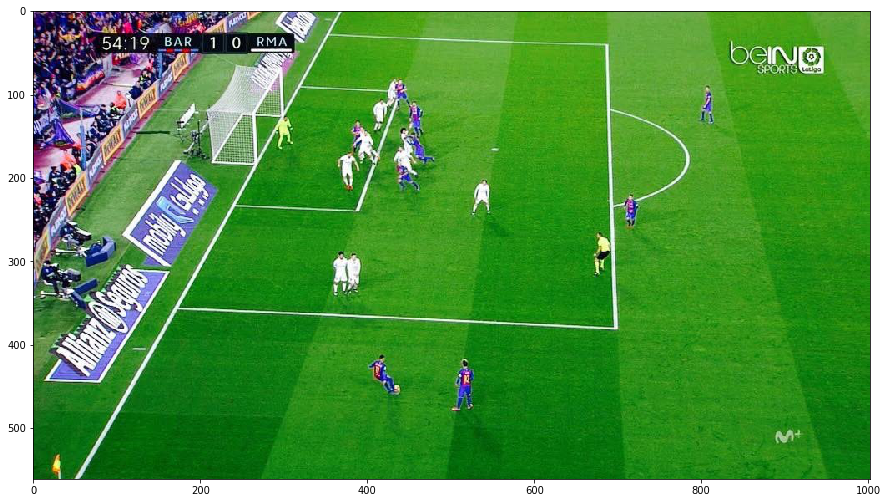

In [15]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# APPLICATION 2: Offside detection
# Write your code here

# load image
image = cv2.imread(images_path + 'offside.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# show it
plt.imshow(image)

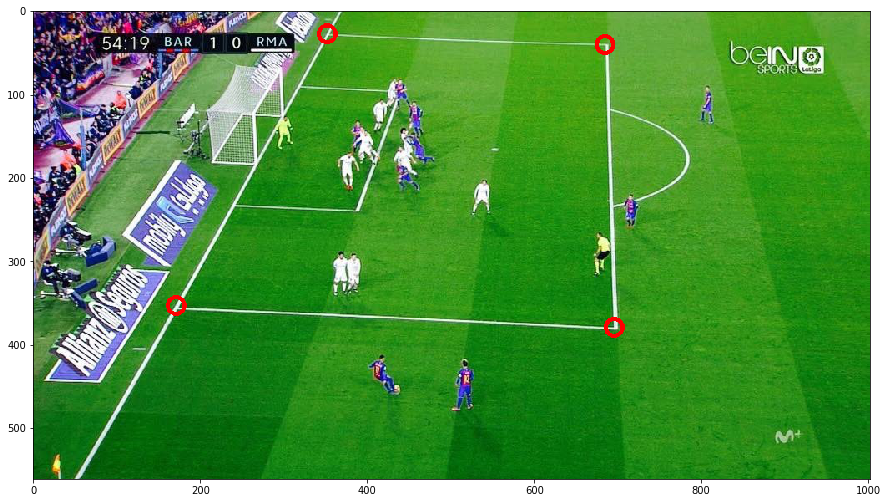

In [16]:
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# point coordinates in the image
pts_src = np.array([[352, 28],
                    [685, 41],
                    [171,353],
                    [696,379]])

image_draw = np.copy(image)
for i in range(4):
    cv2.circle(image_draw,(pts_src[i][0],pts_src[i][1]),10,(255,0,0),3)
plt.imshow(image_draw)

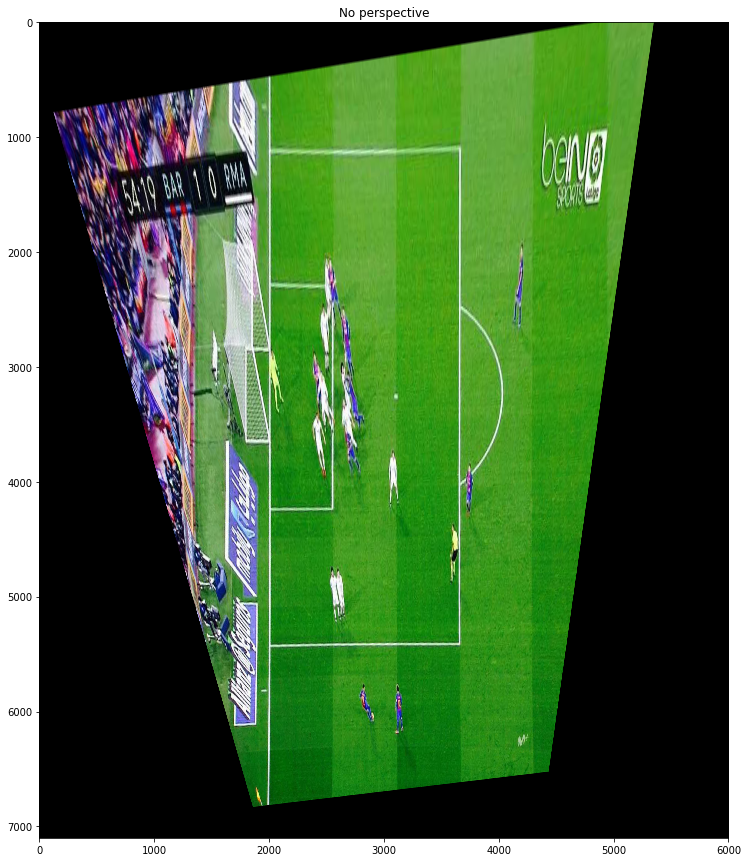

In [17]:
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# Points of a rectangle without perspective
factor = 100 # for better resolution
w = 16.5*factor
h = 43.0*factor
offset_w = 20*factor
offset_h = 11*factor
pts_dst = np.array([[  offset_w,   offset_h], 
                    [w+offset_w,   offset_h], 
                    [  offset_w, h+offset_h], 
                    [w+offset_w, h+offset_h]])

# Calculate Homography
M, status = cv2.findHomography(pts_src, pts_dst)

# Warp source image to destination based on homography
no_perspective = cv2.warpPerspective(image, M, (offset_w+4000,offset_h+6000))
plt.title('No perspective')
plt.imshow(no_perspective)

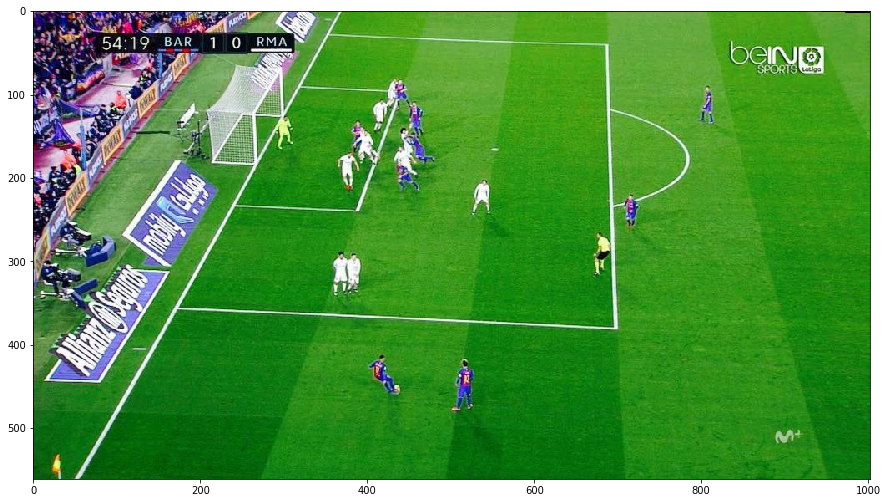

In [18]:
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# Query points (selected manually)
qd_x = offset_w+394
qa_x = offset_w+383
    
# Compute the inverse of the homography
invM = np.linalg.inv(M)

# Get the original perspective again
perspective = cv2.warpPerspective(no_perspective, invM, (image.shape[1],image.shape[0]))
plt.imshow(perspective)

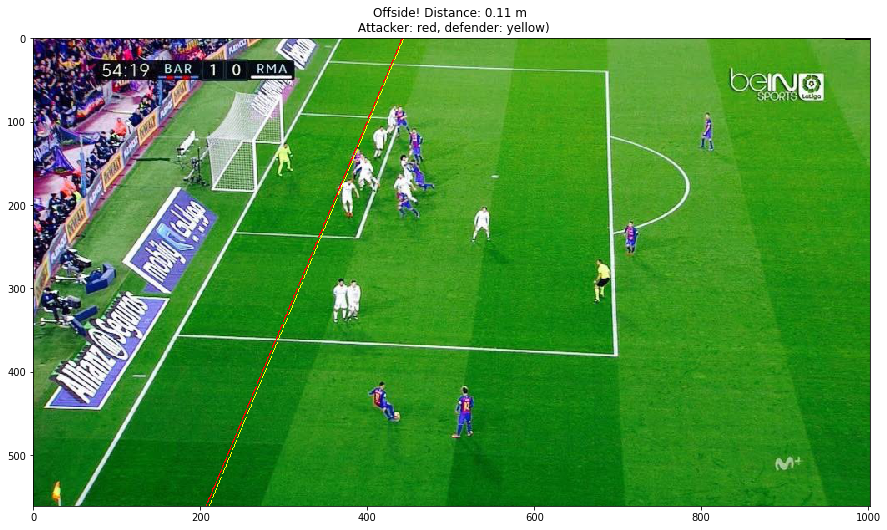

In [19]:
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# Plot lines
# Pick two homogenous points contained in the defender line
def_line = np.array([[qd_x, qd_x],
                     [   0, 4000],
                     [   1,    1]])

# Pick two homogenous points contained in the attacker line
ata_line = np.array([[qa_x, qa_x],
                     [   0, 4000],
                     [   1,    1]])

# Apply inverse homography to the DEFENDER line points taken in the image without perspective
def_line_perspective = invM @ def_line
def_line_perspective = (def_line_perspective / def_line_perspective[2])[0:2] # homogeneous

x1,y1 = def_line_perspective[0,0], def_line_perspective[1,0]
x2,y2 = def_line_perspective[0,1], def_line_perspective[1,1]

# Compute the slope for extending the line segment
def_slope = (y2-y1)/(x2-x1)

# Extend the line segment
x1,y1 = int(x1+3000), int(y1+3000*def_slope)
x2,y2 = int(x2-3000), int(y2-3000*def_slope)

# Draw the defender line
cv2.line(perspective, (x1,y1), (x2,y2),(255,255,0))

# Apply inverse homography to the ATTACKER line points taken in the image without perspective
ata_line_perspective = invM @ ata_line
ata_line_perspective = (ata_line_perspective / ata_line_perspective[2])[0:2] # homogeneous

x1,y1 = ata_line_perspective[0,0], ata_line_perspective[1,0]
x2,y2 = ata_line_perspective[0,1], ata_line_perspective[1,1]

# Compute the slope for extending the line segment
ata_slope = (y2-y1)/(x2-x1)

# Extend the line segment
x1,y1 = int(x1+3000), int(y1+3000*ata_slope)
x2,y2 = int(x2-3000), int(y2-3000*ata_slope)

# Draw the attacker line
cv2.line(perspective, (x1,y1), (x2,y2),(255,0,0), 1, 4)

# VAR results
plt.imshow(perspective)
distance = (qd_x-qa_x)/factor
if distance > 0:
    plt.title("Offside! Distance: %.2f m \n Attacker: red, defender: yellow)" % distance)
else:
    plt.title("Position is correct! Distance: %.2f m \n Attacker: red, defender: yellow" % distance)